0.0058 10899.0 0.23033666666666666


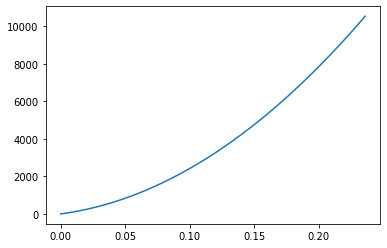

100 12
99 23
98 30
97 37
96 42
95 47
94 52
93 57
92 61
91 66
90 70
89 75
88 80
87 85
86 90
85 95
84 101
83 107
82 113
81 119
80 126
79 132
78 140
77 147
76 154
75 162
74 171
73 179
72 188
71 197
70 207
69 217
68 228
67 239
66 250
65 263
64 275
63 289
62 303
61 317
60 333
59 349
58 366
57 384
56 403
55 423
54 444
53 467
52 490
51 516
50 542
49 571
48 601
47 633
46 667
45 704
44 743
43 785
42 830
41 878
40 930
39 986
38 1047
37 1113
36 1185
35 1262
34 1347
33 1440
32 1542
31 1654
30 1777
29 1914
28 2066
27 2235
26 2425
25 2639
24 2880
23 3154
22 3468
21 3828
20 4245
19 4732
18 5304
17 5984
16 6799
15 7789
14 9007
[100, 12, 99, 23, 98, 30, 97, 37, 96, 42, 95, 47, 94, 52, 93, 57, 92, 61, 91, 66, 90, 70, 89, 75, 88, 80, 87, 85, 86, 90, 85, 95, 84, 101, 83, 107, 82, 113, 81, 119, 80, 126, 79, 132, 78, 140, 77, 147, 76, 154, 75, 162, 74, 171, 73, 179, 72, 188, 71, 197, 70, 207, 69, 217, 68, 228, 67, 239, 66, 250, 65, 263, 64, 275, 63, 289, 62, 303, 61, 317, 60, 333, 59, 349, 58, 366, 57, 384,

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def calc_curve2(Vmax, Amax, J, V0, A0):
    t_reaching_Amax = np.roots([J,A0-Amax])[-1]

    t = t_reaching_Amax
    v__t_reaching_Amax = .5*J*t**2 + A0*t + V0
    
    dt_gliding_a = (Vmax - v__t_reaching_Amax ) / float(Amax)
    assert dt_gliding_a > 0

    print(t_reaching_Amax, v__t_reaching_Amax, dt_gliding_a)

    XT_t__1 = [0]
    while XT_t__1[-1] < t_reaching_Amax :
        r = np.roots([J/6.0, A0/2, V0, -len(XT_t__1)])
        XT_t__1.append(np.real(r[-1]))
    #print(XT_t)
    
    
    XT_t__2 = [0]
    A = Amax
    V = v__t_reaching_Amax
    while XT_t__2[-1] < dt_gliding_a :
        r = np.roots([A/2., V, -len(XT_t__2)])
        XT_t__2.append(np.real(r[-1]))
    XT_t__2 = XT_t__2[1:] + XT_t__1[-1]
    '''
    XT_t__3 = [0]
    A = Amax
    V = v__t_reaching_Amax + Amax * dt_gliding_a
    while XT_t__3[-1] < t_reaching_Amax :
        r = np.roots([-J/6.0, A/2., V, -len(XT_t__3)])
        XT_t__3.append(np.real(r[-1]))
    
    
    
    XT_t__3 = XT_t__3[1:] + XT_t__2[-1]
    '''
    XT_t = np.concatenate([XT_t__1, XT_t__2])

    plt.plot(XT_t, range(len(XT_t)))
    plt.show()
    

    delays = np.round(np.diff(XT_t)*1e6)
    delay_change = np.where(delays[:-1] != delays[1:])[0]+1
    curve = []
    for i in delay_change:
        print(int(delays[i-1]), i)
        if(45<delays[i-1] < 200):
            curve.append(int(delays[i-1]))
            curve.append(int(i))
    #print(int(delays[i-1]) - 1, 1)
    #curve.append(int(curve[-2]))
    #curve.append(1)
    print(curve)
    print(sum(curve[1::2]))
    return curve



z = calc_curve2(
    Vmax=80 * 1000,
    Amax=300 * 1000,
    J=50 * 1000 * 1000,
    A0=10 * 1000,
    V0=10 * 1000,
)